### Descripicion del Dataset

Factores en el rendimiento de estudiantes de diferentes grados escolares

Horas de estudio horas
Asistencia porcentaje
* Participacion de los padres baja media alta (relativo, este dato lo podemos dejar fuera, ya que depende de como se evalue, puede causar conflicto)
* Acceso a recursos bajo, medio alto (relativo)
Actividades extracurriculares si/no
Horas de sueño horas
Puntuaciones anteriores calificaciones
Nivel de motivacion Bajo medio alto
Acceso a internet si no
Sesiones de tutoria Horas
ingreso familiar bajo medio alto
calidad de enseñanza bajo medio alto
tipo de escuela privada publica
Percepcion del clima escolar y ambiente laboral positivo negativo
Actividad Fisica horas
Dificultades de aprendizaje si no
Nivel educativo de los padres secundaria universidad posgrado
Ditancia de casa cerca moderada lejos
Genero 
*variable objetivo = Calificacion de examen*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
student = pd.read_csv(r'E:\TRIPLETEN\StudentPerformanceFactors.csv')

In [3]:
student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
student.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
student.shape

(6607, 20)

In [7]:
student.duplicated().value_counts()

False    6607
Name: count, dtype: int64

In [8]:
student.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
student.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [10]:
student['Teacher_Quality'].isna().value_counts()

Teacher_Quality
False    6529
True       78
Name: count, dtype: int64

In [11]:
student['Distance_from_Home'].isna().value_counts()

Distance_from_Home
False    6540
True       67
Name: count, dtype: int64

In [12]:
student['Parental_Education_Level'].isna().value_counts()

Parental_Education_Level
False    6517
True       90
Name: count, dtype: int64

Separamos las columnas que contienen los valores nulos, aunque son pocos los valores, estas tres columnas representan parte importante del df

In [13]:
agrup_cols_nulos = student[['Teacher_Quality','Distance_from_Home','Parental_Education_Level']].sort_values(by='Distance_from_Home', ascending=False)
agrup_cols_nulos.value_counts().reset_index().head()

,Teacher_Quality,Distance_from_Home,Parental_Education_Level,count
0,Medium,Near,High School,1140
1,Medium,Near,College,695
2,Medium,Moderate,High School,580
3,High,Near,High School,564
4,Medium,Near,Postgraduate,447


In [14]:
grado_escolar = agrup_cols_nulos['Parental_Education_Level'].value_counts()
grado_escolar

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [15]:
distancia = agrup_cols_nulos['Distance_from_Home'].value_counts()
distancia

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [16]:
calidad_educativa = agrup_cols_nulos['Teacher_Quality']
calidad_educativa.value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Teacher_Quality'>

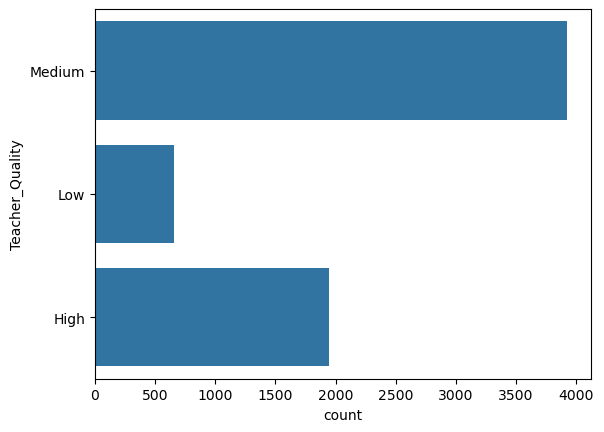

In [17]:
sns.countplot(agrup_cols_nulos['Teacher_Quality'])

<Axes: xlabel='count', ylabel='Distance_from_Home'>

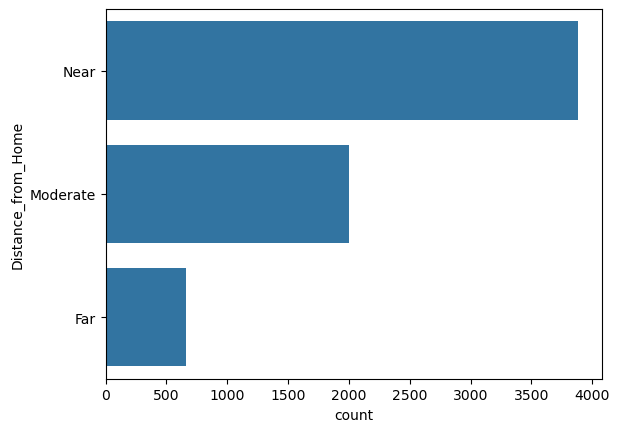

In [18]:
sns.countplot(agrup_cols_nulos['Distance_from_Home'])

<Axes: xlabel='count', ylabel='Parental_Education_Level'>

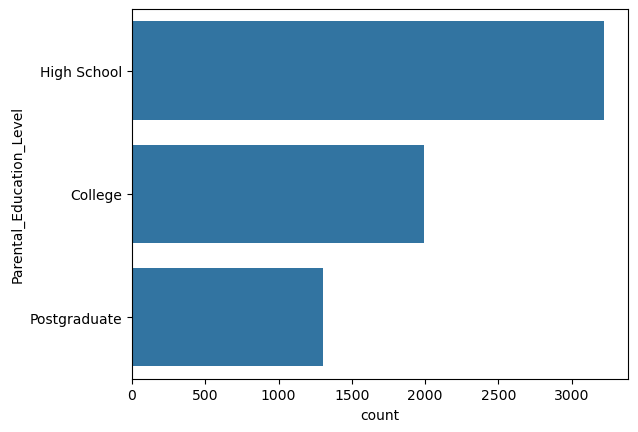

In [19]:
sns.countplot(agrup_cols_nulos['Parental_Education_Level'])

In [20]:
nulos = student.groupby('Parental_Education_Level')[['Distance_from_Home','Teacher_Quality']].apply(lambda x:x.isna().sum()).reset_index()
nulos

,Parental_Education_Level,Distance_from_Home,Teacher_Quality
0,College,25,25
1,High School,30,35
2,Postgraduate,12,14


In [21]:
student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<Axes: xlabel='count', ylabel='Motivation_Level'>

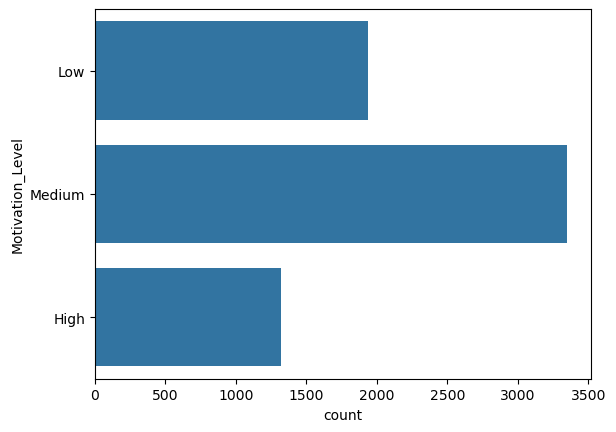

In [22]:
sns.countplot(student['Motivation_Level'])

In [23]:
plot = student.groupby('Motivation_Level')['Exam_Score'].value_counts().sort_values().reset_index().head()
plot.columns = ['Motivation_Level','Exam_Score','Frecuencia']

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\1856996055.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Nivel de Motivacion')


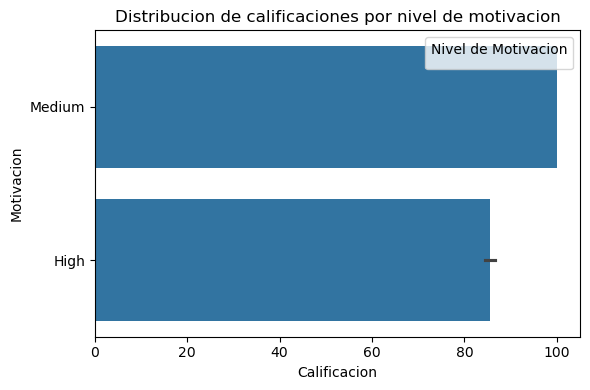

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(data=plot,x='Exam_Score', y='Motivation_Level')
plt.title('Distribucion de calificaciones por nivel de motivacion')
plt.xlabel('Calificacion')
plt.ylabel('Motivacion')
plt.legend(title='Nivel de Motivacion')
plt.tight_layout()
plt.show()

In [25]:
Horas_estudio = student['Hours_Studied'].value_counts().reset_index().sort_values(by='count')
Horas_estudio.columns=['Horas', 'Frecuencia']
Horas_estudio = Horas_estudio.sort_values(by='Horas')
Horas_estudio.head()

,Horas,Frecuencia
38,1,3
37,2,6
32,3,12
31,4,17
28,5,21


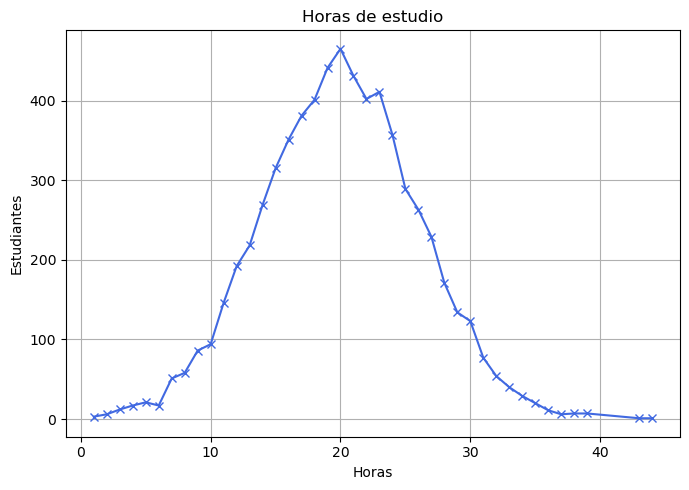

In [26]:
plt.figure(figsize=(7,5))
plt.plot(Horas_estudio['Horas'], Horas_estudio['Frecuencia'], marker='x', color='royalblue')
plt.title('Horas de estudio')
plt.xlabel('Horas')
plt.ylabel('Estudiantes')
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
horas_sueño = student.groupby('Sleep_Hours')[['Hours_Studied','Previous_Scores','Exam_Score']]\
.mean().reset_index().sort_values(by='Exam_Score', ascending=False)
horas_sueño.head(10)

,Sleep_Hours,Hours_Studied,Previous_Scores,Exam_Score
0,4,19.760518,75.511327,67.627832
1,5,20.028777,75.329496,67.297842
3,7,19.915566,75.041930,67.242964
4,8,19.990708,75.030021,67.218728
2,6,19.933140,75.478924,67.194767
5,9,20.073548,74.212903,67.149677
6,10,20.275641,74.727564,67.137821


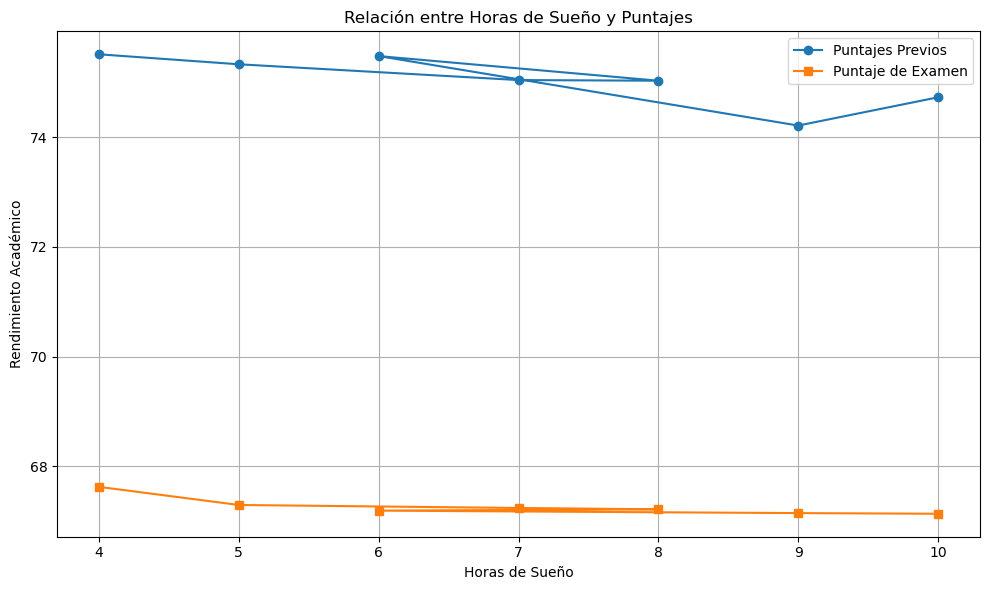

In [28]:
plt.figure(figsize=(10,6))

# Línea 1: Previous Scores vs Sleep Hours
plt.plot(horas_sueño['Sleep_Hours'], horas_sueño['Previous_Scores'], marker='o', label='Puntajes Previos')

# Línea 2: Exam Score vs Sleep Hours
plt.plot(horas_sueño['Sleep_Hours'], horas_sueño['Exam_Score'], marker='s', label='Puntaje de Examen')

plt.xlabel('Horas de Sueño')
plt.ylabel('Rendimiento Académico')
plt.title('Relación entre Horas de Sueño y Puntajes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


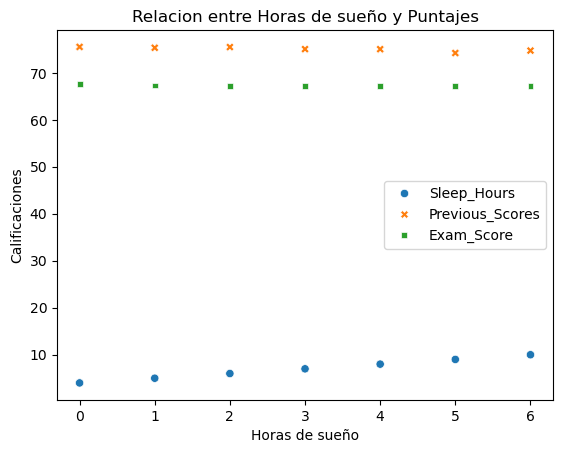

In [29]:
sns.scatterplot(horas_sueño[['Sleep_Hours','Previous_Scores','Exam_Score']])
plt.title('Relacion entre Horas de sueño y Puntajes')
plt.xlabel('Horas de sueño')
plt.ylabel('Calificaciones')
plt.legend()
plt.show()

In [30]:
horas_estudio = student.groupby('Hours_Studied')[['Sleep_Hours','Previous_Scores','Exam_Score']]\
.mean().reset_index().sort_values(by='Exam_Score', ascending=False)
horas_estudio.head(10)

,Hours_Studied,Sleep_Hours,Previous_Scores,Exam_Score
39,43,7.000000,97.000000,78.000000
38,39,7.571429,77.285714,74.714286
36,37,7.166667,74.166667,73.333333
37,38,6.000000,78.285714,72.714286
34,35,6.900000,76.750000,71.800000
35,36,7.090909,76.454545,71.181818
0,1,6.000000,78.333333,71.000000
40,44,9.000000,75.000000,71.000000
31,32,7.129630,76.092593,70.944444
33,34,7.413793,76.206897,70.724138


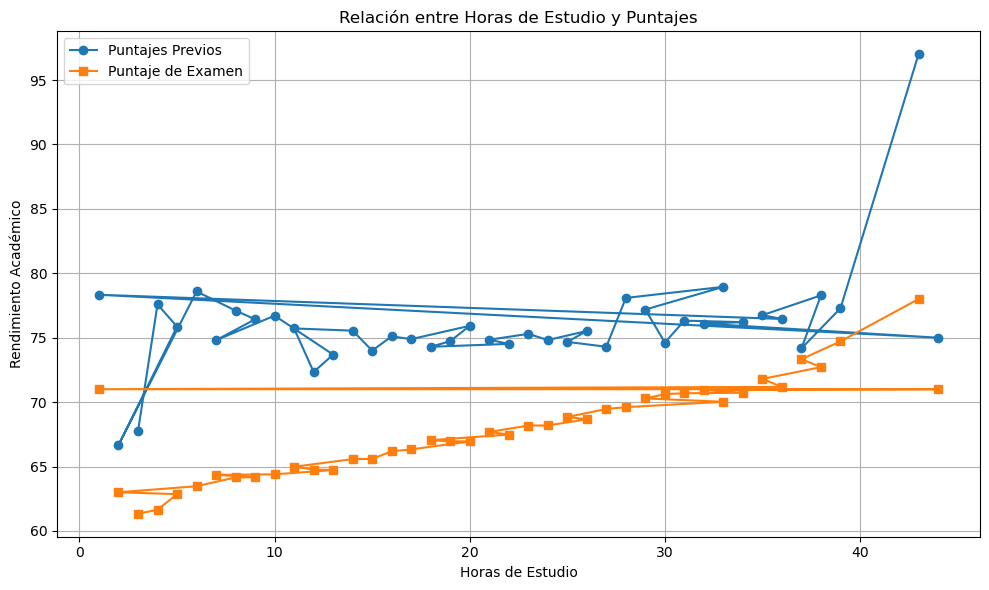

In [31]:
plt.figure(figsize=(10,6))

# Línea 1: Previous Scores vs Sleep Hours
plt.plot(horas_estudio['Hours_Studied'], horas_estudio['Previous_Scores'], marker='o', label='Puntajes Previos')

# Línea 2: Exam Score vs Sleep Hours
plt.plot(horas_estudio['Hours_Studied'], horas_estudio['Exam_Score'], marker='s', label='Puntaje de Examen')

plt.xlabel('Horas de Estudio')
plt.ylabel('Rendimiento Académico')
plt.title('Relación entre Horas de Estudio y Puntajes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


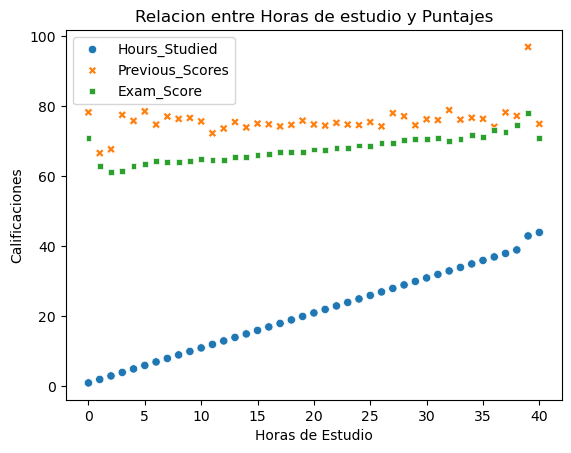

In [32]:
sns.scatterplot(horas_estudio[['Hours_Studied', 'Previous_Scores','Exam_Score']])
plt.title('Relacion entre Horas de estudio y Puntajes')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificaciones')
plt.legend()
plt.show()

In [33]:
sueño = student[['Hours_Studied','Sleep_Hours','Previous_Scores','Exam_Score']].sort_values(by='Exam_Score', ascending=False)
sueño

,Hours_Studied,Sleep_Hours,Previous_Scores,Exam_Score
1525,27,6,93,101
94,18,4,73,100
2425,23,4,89,99
3579,14,8,86,99
6393,16,8,92,98
...,...,...,...,...
5907,3,6,78,57
5719,9,10,68,57
2880,7,8,68,57
5507,5,7,71,56


C:\Users\dell\AppData\Local\Temp\ipykernel_4368\1159016534.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


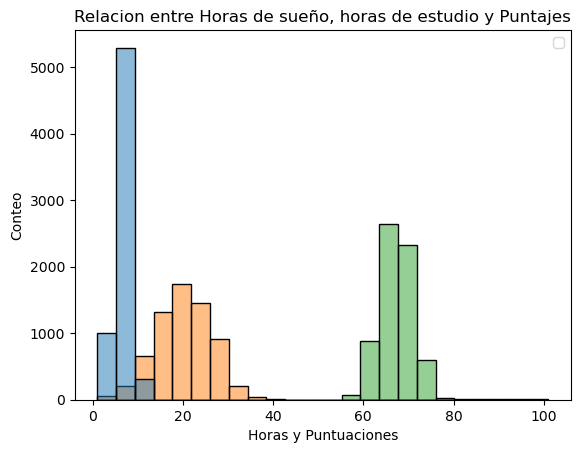

In [34]:
sns.histplot(sueño[['Sleep_Hours','Hours_Studied','Exam_Score']])
plt.title('Relacion entre Horas de sueño, horas de estudio y Puntajes')
plt.xlabel('Horas y Puntuaciones')
plt.ylabel('Conteo')
plt.legend()
plt.show()

In [35]:
sueño.describe()

,Hours_Studied,Sleep_Hours,Previous_Scores,Exam_Score
count,6607.000000,6607.00000,6607.000000,6607.000000
mean,19.975329,7.02906,75.070531,67.235659
std,5.990594,1.46812,14.399784,3.890456
min,1.000000,4.00000,50.000000,55.000000
25%,16.000000,6.00000,63.000000,65.000000
50%,20.000000,7.00000,75.000000,67.000000
75%,24.000000,8.00000,88.000000,69.000000
max,44.000000,10.00000,100.000000,101.000000


-Rellenar valores nulos en las columnas correspondientes con Missing <br>
-Convertir valores categoricos con OHE

In [36]:
sueño_vs_score = sueño[['Sleep_Hours','Exam_Score']].value_counts().reset_index().sort_values(by='Exam_Score', ascending=False)
sueño_vs_score

,Sleep_Hours,Exam_Score,count
179,6,101,1
152,4,100,1
169,8,99,1
153,4,99,1
140,9,98,1
...,...,...,...
177,7,57,1
137,6,57,1
141,10,57,1
178,7,56,1


In [37]:
sueño['Hours_Studied'].value_counts().reset_index().sort_values(by='count', ascending=False).head()

,Hours_Studied,count
0,20,465
1,19,441
2,21,431
3,23,411
4,22,402


In [38]:
student.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [39]:
student= student.fillna('Missing')

In [40]:
student.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [41]:
student[student['Teacher_Quality'].isna()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [42]:
student.isin(['Missing']).sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [43]:
student.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [44]:
factores_externos = student.groupby('Access_to_Resources')[['Parental_Involvement','Extracurricular_Activities','Internet_Access','Peer_Influence','Distance_from_Home','Exam_Score']].value_counts().reset_index()\
.sort_values(by='Exam_Score', ascending=False).head(30)

In [45]:
factores_externos[['Access_to_Resources','Internet_Access']].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False)

,Access_to_Resources,Internet_Access,proportion
0,Medium,Yes,0.466667
1,High,Yes,0.333333
2,Low,Yes,0.100000
3,Medium,No,0.066667
4,High,No,0.033333


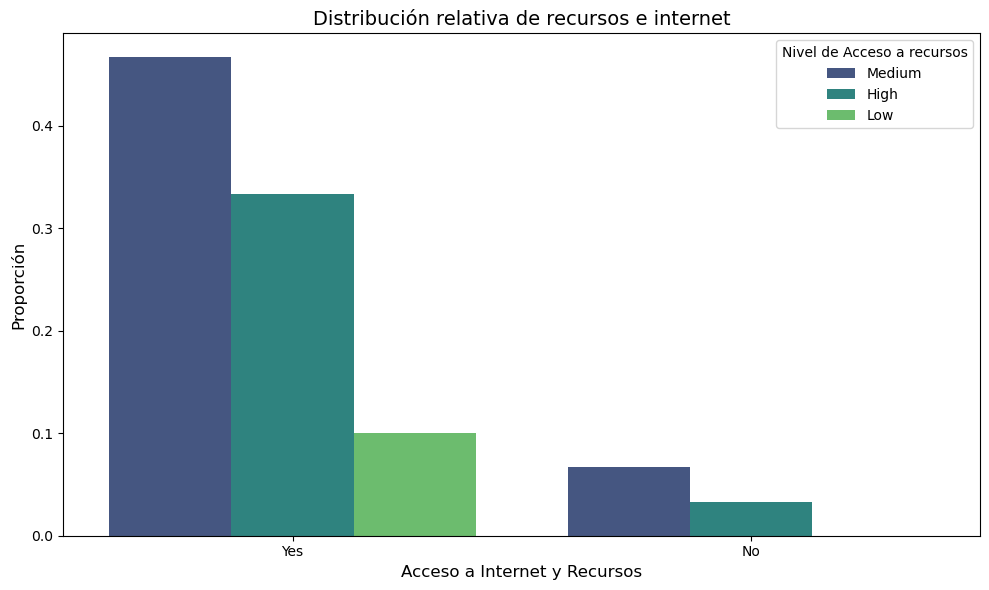

In [46]:
# Calculate relative frequencies
frec_access = factores_externos[['Access_to_Resources','Internet_Access']].value_counts(normalize=True).reset_index(name='Proporcion').sort_values(by='Internet_Access', ascending=False)

# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=frec_access, x='Internet_Access', y='Proporcion', hue='Access_to_Resources', palette='viridis')

plt.title('Distribución relativa de recursos e internet', fontsize=14)
plt.xlabel('Acceso a Internet y Recursos', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.legend(title='Nivel de Acceso a recursos')
plt.tight_layout()

Aqui se observa que no existe registro de alumnos que no cuenten con servicio de internet por falta de recursos

In [47]:
sin_internet=factores_externos[factores_externos['Internet_Access']=='No']
recursos_bajos = sin_internet[sin_internet['Access_to_Resources']=='Low']
proporcion_bajos = len(recursos_bajos)/len(sin_internet)
print(f'Proporcion de estudiantes que NO cuentan con acceso a internet con recursos bajos: {proporcion_bajos}%')

Proporcion de estudiantes que NO cuentan con acceso a internet con recursos bajos: 0.0%


In [48]:
factores_externos[['Distance_from_Home','Exam_Score']].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False).head()

,Distance_from_Home,Exam_Score,proportion
0,Near,97,0.100000
2,Near,98,0.066667
3,Moderate,89,0.066667
4,Moderate,94,0.066667
5,Near,95,0.066667


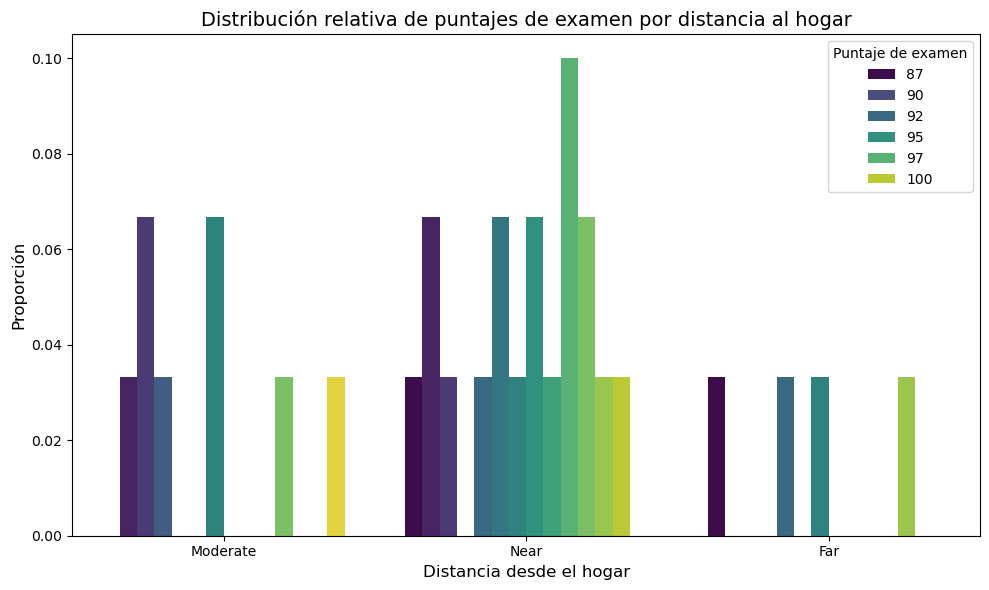

In [49]:
# Calculate relative frequencies
frecuencias = factores_externos[['Distance_from_Home','Exam_Score']].value_counts(normalize=True).reset_index(name='Proporcion').sort_values(by='Exam_Score', ascending=False)

# Create bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=frecuencias, x='Distance_from_Home', y='Proporcion', hue='Exam_Score', palette='viridis')

plt.title('Distribución relativa de puntajes de examen por distancia al hogar', fontsize=14)
plt.xlabel('Distancia desde el hogar', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.legend(title='Puntaje de examen')
plt.tight_layout()

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\176480681.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Access_to_Resources', data=factores_externos, palette='Set2')


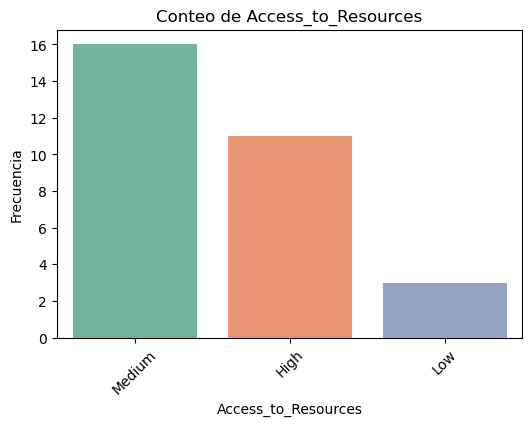

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Access_to_Resources', data=factores_externos, palette='Set2')
plt.title('Conteo de Access_to_Resources')
plt.xlabel('Access_to_Resources')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='count', ylabel='Internet_Access'>

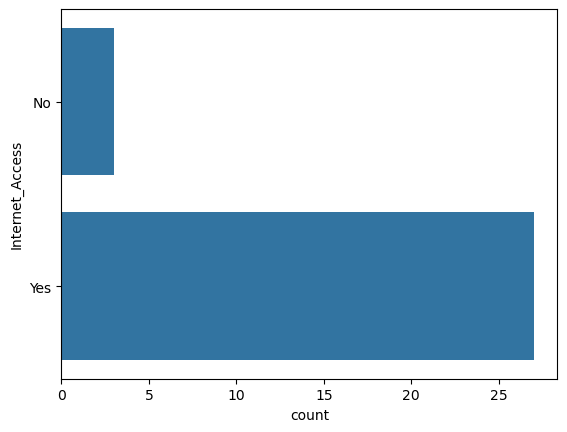

In [51]:
sns.countplot(factores_externos['Internet_Access'])

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\3571108076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=factores_externos, palette='Set3')


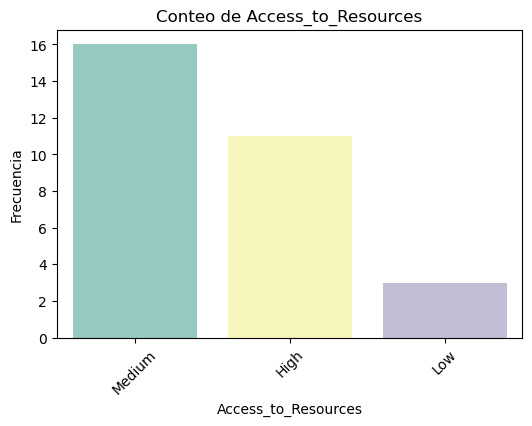

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\3571108076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=factores_externos, palette='Set3')


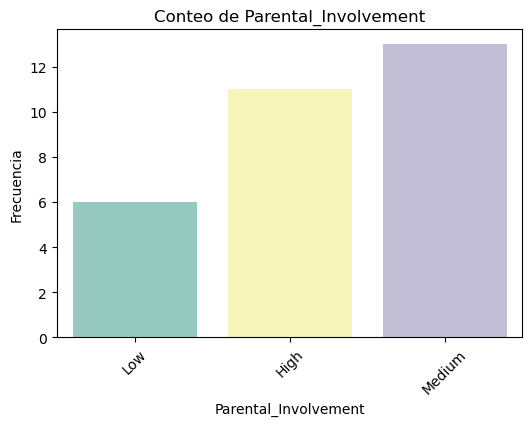

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\3571108076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=factores_externos, palette='Set3')


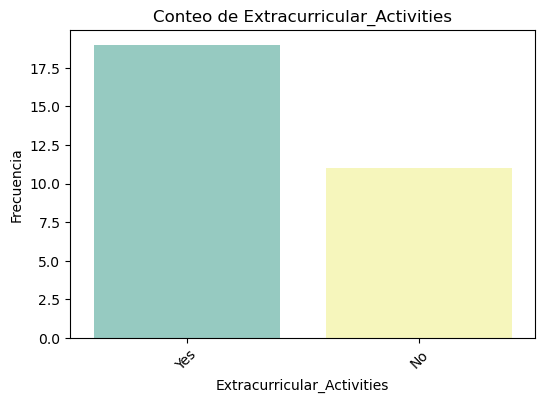

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\3571108076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=factores_externos, palette='Set3')


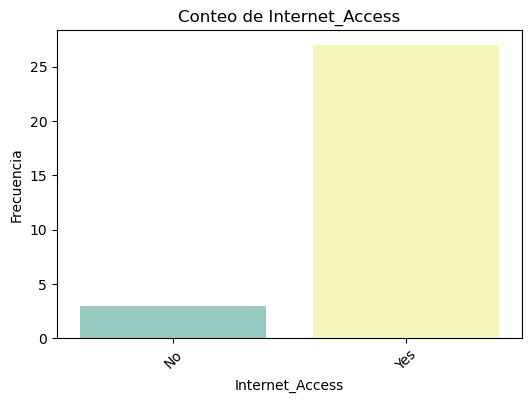

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\3571108076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=factores_externos, palette='Set3')


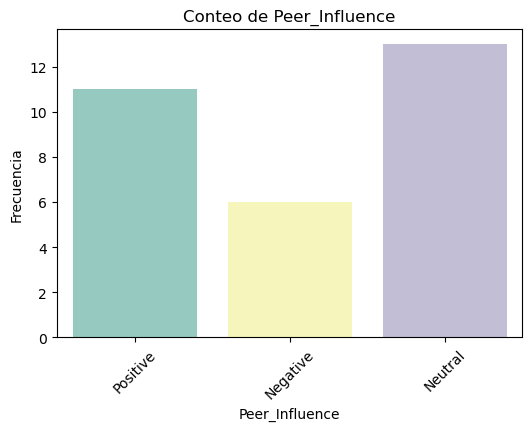

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\3571108076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=factores_externos, palette='Set3')


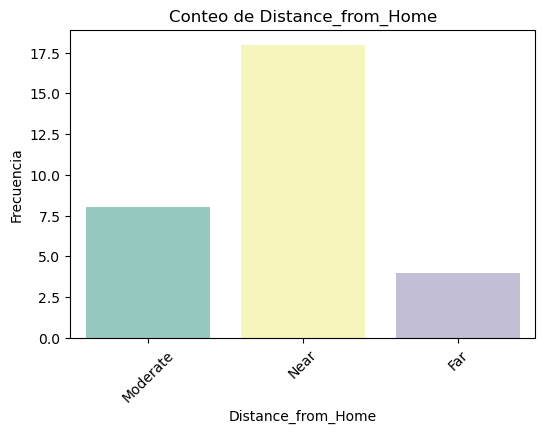

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\3571108076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=factores_externos, palette='Set3')


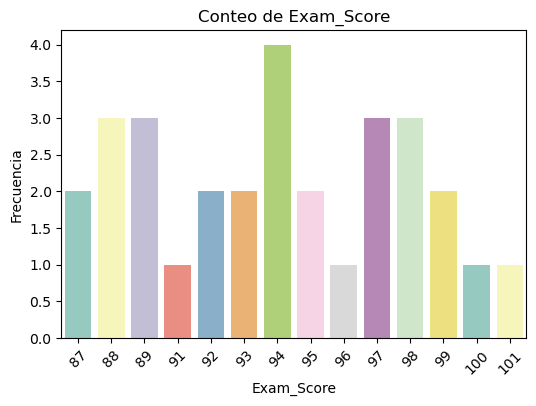

In [52]:
categoricas = ['Access_to_Resources','Parental_Involvement','Extracurricular_Activities','Internet_Access','Peer_Influence','Distance_from_Home','Exam_Score']
for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=factores_externos, palette='Set3')
    plt.title(f'Conteo de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

#### Preprocesamiento de Datos
Aplicamos OHE para unificar el DF y poder procesarlo de forma que podamos aplicar algoritmos que nos indiquen las condiciones y tendencias

In [53]:
student.head(2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61


In [54]:
filtrado = pd.get_dummies(student).astype(int)
filtrado.head(2)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Missing,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Missing,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,7,73,0,3,67,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,19,64,8,59,2,4,61,0,1,0,...,1,0,0,0,0,0,1,0,1,0


In [55]:
filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Hours_Studied                          6607 non-null   int32
 1   Attendance                             6607 non-null   int32
 2   Sleep_Hours                            6607 non-null   int32
 3   Previous_Scores                        6607 non-null   int32
 4   Tutoring_Sessions                      6607 non-null   int32
 5   Physical_Activity                      6607 non-null   int32
 6   Exam_Score                             6607 non-null   int32
 7   Parental_Involvement_High              6607 non-null   int32
 8   Parental_Involvement_Low               6607 non-null   int32
 9   Parental_Involvement_Medium            6607 non-null   int32
 10  Access_to_Resources_High               6607 non-null   int32
 11  Access_to_Resources_Low       

#### Random Forest Regressor
Aplicamos Random Forest para conocer la importancia de las variables con base en los valores que se encuentran en cada una, ordenadas de la mas elevada a la mas baja

In [56]:
# Variables predictoras y objetivo
x = filtrado.drop('Exam_Score', axis=1)
y = filtrado['Exam_Score']

# Codificación de categóricas, si aun no se ha realizado
#x = pd.get_dummies(x, drop_first=True)

#Dividir el dataset original en conjuntos de entrenamiento-validacion y prueba, en el mismo se considera el 20% en tamaño de prueba
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.20, random_state=54321)

#Despues, dividimos el conjunto construido en la primera linea, entrenamiento y validacion
# Para este caso se tiene el 80% del original, y queremos que la validación sea el 25% de eso lo que corresponde a (0.25 * 0.80 = 0.20 del total)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=54321)
# División en train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor(random_state=12345, n_estimators=80, max_depth=20)
model.fit(x_train, y_train)

# Importancia de variables
importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
importances.head()

Attendance           0.376379
Hours_Studied        0.239364
Previous_Scores      0.081192
Tutoring_Sessions    0.031922
Physical_Activity    0.025055
dtype: float64

In [57]:
#Validacion
y_valid_pred = model.predict(x_valid)
print(f'R2:', r2_score(y_valid, y_valid_pred))
print(f'MAE:', mean_absolute_error(y_valid, y_valid_pred))

# 5. Evaluación en prueba
y_test_pred = model.predict(x_test)
print("R² prueba:", r2_score(y_test, y_test_pred))
print("MAE prueba:", mean_absolute_error(y_test, y_test_pred))

R2: 0.9160565957438287
MAE: 0.5674495284840713
R² prueba: 0.668937408093806
MAE prueba: 1.0886612558381743


#### Decission Tree Regressor
Aplicamos Arbol de Decision

In [58]:
# Modelo Arbol de Decision
model_DTR = DecisionTreeRegressor(random_state=12345, max_depth=10)
model_DTR.fit(x_train, y_train)

# Importancia de variables
importances = pd.Series(model_DTR.feature_importances_, index=x.columns).sort_values(ascending=False)
importances.head()

Attendance           0.403333
Hours_Studied        0.264173
Previous_Scores      0.077174
Tutoring_Sessions    0.031929
Physical_Activity    0.026512
dtype: float64

In [59]:
#Validacion
y_valid_pred_DTR = model_DTR.predict(x_valid)
print(f'R2:', r2_score(y_valid, y_valid_pred))
print(f'MAE:', mean_absolute_error(y_valid, y_valid_pred))

# 5. Evaluación en prueba
y_test_pred_DTR = model_DTR.predict(x_test)
print("R² prueba:", r2_score(y_test, y_test_pred))
print("MAE prueba:", mean_absolute_error(y_test, y_test_pred))

R2: 0.9160565957438287
MAE: 0.5674495284840713
R² prueba: 0.668937408093806
MAE prueba: 1.0886612558381743


#### Regresion Lineal

In [60]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

#Validacion

y_valid_pred = model_LR.predict(x_valid)
print(f'R2:', r2_score(y_valid, y_valid_pred))
print(f'MAE:', mean_absolute_error(y_valid, y_valid_pred))

# 5. Evaluación en prueba
y_test_pred = model_LR.predict(x_test)
print("R² prueba:", r2_score(y_test, y_test_pred))
print("MAE prueba:", mean_absolute_error(y_test, y_test_pred))

R2: 0.8289307819414499
MAE: 0.4240439692706043
R² prueba: 0.7699282240123634
MAE prueba: 0.4499495002270697


*Aplicamos el uso de coeficientes para conocer los factores que afectan de forma directa el puntaje*

In [61]:
coeficientes = pd.Series(model_LR.coef_, index=x.columns).sort_values(ascending=False)
tabla = coeficientes.reset_index()
tabla.columns=['Variable', 'Coeficientes']
tabla.head()

,Variable,Coeficientes
0,Access_to_Resources_High,1.044352
1,Parental_Involvement_High,1.024725
2,Family_Income_High,0.582123
3,Parental_Education_Level_Postgraduate,0.581993
4,Teacher_Quality_High,0.545695


C:\Users\dell\AppData\Local\Temp\ipykernel_4368\1399986464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coeficientes.values, y=coeficientes.index, palette='viridis')


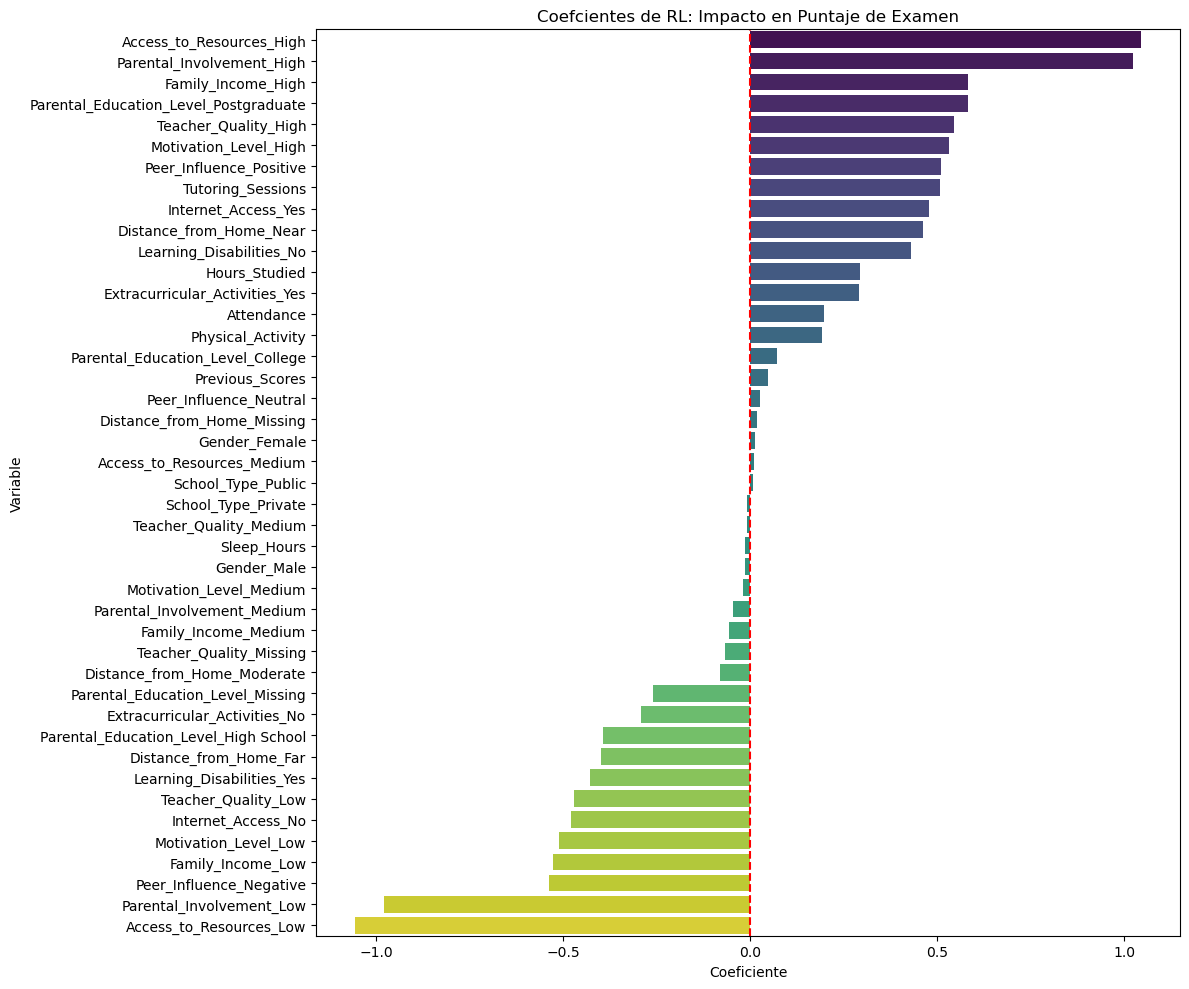

In [62]:
plt.figure(figsize=(12,10))
sns.barplot(x=coeficientes.values, y=coeficientes.index, palette='viridis')
plt.title('Coefcientes de RL: Impacto en Puntaje de Examen')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.axvline(0, color='red',linestyle='--')
plt.tight_layout()
plt.show()

De forma general podemos observar que los factores, con base en el modelo aplicado de regresion lineal, que mayor influencia tienen en las calificaciones del examen son:
**Acceso a recursos alto<br> involucramiento parental alto <br> Ingreso Familiar alto <br> Nivel educativo parental Posgrado <br> Calidad de enseñanza <br> Nivel de motivacion alto <br> Influencia del ambiente positiva <br> Sesiones de Tutoria <br> Acceso a Internet <br> Distancia del Hogar <br>**
Encontrando las horas de estudio y de sueño en las posiciones 11 y 24 respectivamente

In [63]:
tabla.index[(tabla['Variable'].isin(['Hours_Studied','Sleep_Hours']))]

Index([11, 24], dtype='int64')

Aplicamos modelos de regresion lineal para conocer los factores que pueden incidir directamente en que los estudiantes puedan obtener resultados bajos y con ello poder predecir que estrategias implementar para evitar que reprueben
A continuacion se aplico un modelo de regresion logistica, el cual nos permite confirmar que las variables observadas anteriormente, son directamente proporcionales a las obtenidas con la Regresion Lineal, mostrando los valores que afectan de forma negativa o se ve que impactan a los estudiantes que muestran tendencias a la baja en las calificaciones

In [71]:
#filtrado['Low_Score'] = (filtrado['Exam_Score']<70).astype(int)
#filtrado['Low_Score'].value_counts()

Low_Score
1    4982
0    1625
Name: count, dtype: int64

In [66]:
# Variables predictoras y objetivo
x = filtrado.drop('Exam_Score', axis=1)
y = (filtrado['Exam_Score']<70).astype(int)

# Codificación de categóricas, si aun no se ha realizado
#x = pd.get_dummies(x, drop_first=True)

#Dividir el dataset original en conjuntos de entrenamiento-validacion y prueba, en el mismo se considera el 20% en tamaño de prueba
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.20, random_state=54321)

#Despues, dividimos el conjunto construido en la primera linea, entrenamiento y validacion
# Para este caso se tiene el 80% del original, y queremos que la validación sea el 25% de eso lo que corresponde a (0.25 * 0.80 = 0.20 del total)

x_train, x_valid, y_train, y_valid = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=54321)
# División en train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modelo
model_Logis = LogisticRegression(max_iter=1000)
model_Logis.fit(x_train, y_train)

# Importancia de variables
coef = pd.Series(model_Logis.coef_[0], index=x.columns).sort_values(ascending=False)
coef.head()

C:\Users\dell\anaconda3\envs\vision_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Access_to_Resources_Low                 2.111962
Parental_Involvement_Low                2.021762
Parental_Education_Level_High School    1.257029
Teacher_Quality_Low                     1.210462
Internet_Access_No                      1.155135
dtype: float64

Aplicamos un modelo de regresion logistica, con el que podemos observar las condiciones que desfavorecen, segun este modelo, la mejora de los estudiantes, entre los cuales se mencionan Acceso a los recursos (BAJO), Involucramiento de los padres(BAJO), Nivel de Educacion de los Padres(Secundaria), Calidad de enseñanza (BAJA), Sin Acceso a Internet, considerados como los principales factores influyentes en las bajas evaluaciones de los estudiantes

C:\Users\dell\AppData\Local\Temp\ipykernel_4368\3131304658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef.values, y=coef.index, palette='viridis')


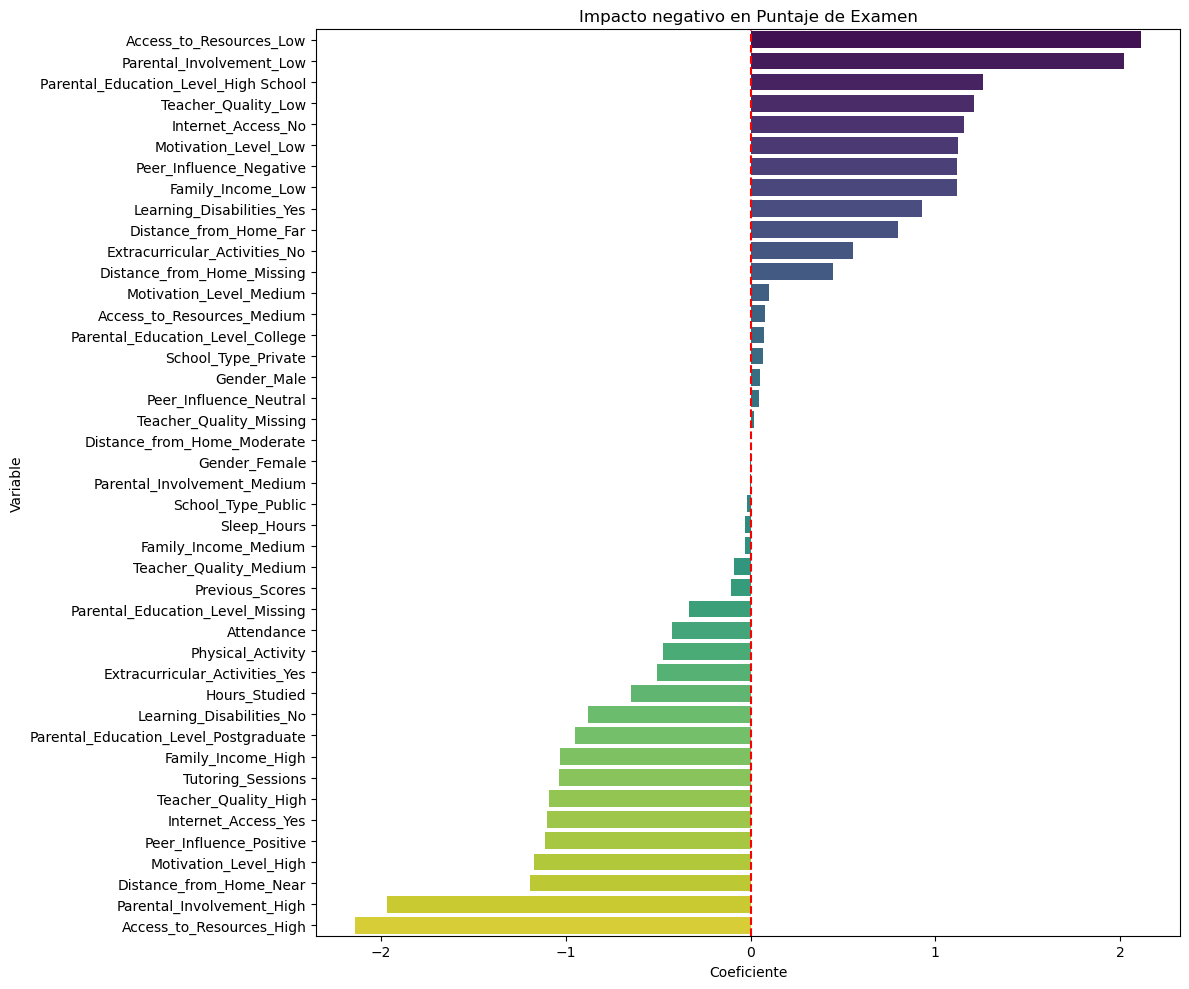

In [65]:
plt.figure(figsize=(12,10))
sns.barplot(x=coef.values, y=coef.index, palette='viridis')
plt.title('Impacto negativo en Puntaje de Examen')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.axvline(0, color='red',linestyle='--')
plt.tight_layout()
plt.show()